In [99]:
import numpy as np
import pandas as pd
pd.set_option('mode.chained_assignment', None) # to avoid  SettingWithCopyWarning
import matplotlib.pyplot as plt
import folium #for map


# Loading of the data file

In [100]:
df=pd.read_csv("HousingPrices-Amsterdam.csv",index_col="Unnamed: 0")

In [101]:
df


,Address,Zip,Price,Area,Room,Lon,Lat
1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...,...,...
920,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173
921,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587
922,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256
923,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268


# Data shape and structure

In [102]:
df.shape

(924, 7)

In [103]:
df.columns

Index(['Address', 'Zip', 'Price', 'Area', 'Room', 'Lon', 'Lat'], dtype='object')

# Data Cleaning

In [104]:
df.isnull().sum()

Address    0
Zip        0
Price      4
Area       0
Room       0
Lon        0
Lat        0
dtype: int64

In [105]:
df = df.dropna() #dropping the null values
df.isnull().sum()

Address    0
Zip        0
Price      0
Area       0
Room       0
Lon        0
Lat        0
dtype: int64

## Remove duplicates

In [106]:
df[df.duplicated()]

,Address,Zip,Price,Area,Room,Lon,Lat
910,"Quashibastraat, Amsterdam",1087 VS,348738.0,79,4,5.016555,52.350513


In [107]:
df.drop_duplicates(inplace=True)



In [108]:
df.duplicated().sum()

0

In [109]:
df.shape


(919, 7)

### Removing the repitition of the word 'Amsterdam' from entire 'Address' column.

#### The Amsterdam Housing Price dataset provides the sales price of individual residential property in Amsterdam, Netherlands. So the word 'Amsterdam' is not necessary in the address column 

In [110]:
df['Address']=df['Address'].str.replace('Amsterdam', '') #replace, strip can be used
df['Address'].head()

1              Blasiusstraat 8 2, 
2    Kromme Leimuidenstraat 13 H, 
3                Zaaiersweg 11 A, 
4              Tenerifestraat 40, 
5                Winterjanpad 21, 
Name: Address, dtype: object

### Extracting the numeric part of Zip code

In [111]:
df['Zip_number']=df['Zip'].apply(lambda x: x.split(' ')[0])
df['Zip_number'].head()

1    1091
2    1059
3    1097
4    1060
5    1036
Name: Zip_number, dtype: object

In [112]:
df.head()

,Address,Zip,Price,Area,Room,Lon,Lat,Zip_number
1,"Blasiusstraat 8 2,",1091 CR,685000.0,64,3,4.907736,52.356157,1091
2,"Kromme Leimuidenstraat 13 H,",1059 EL,475000.0,60,3,4.850476,52.348586,1059
3,"Zaaiersweg 11 A,",1097 SM,850000.0,109,4,4.944774,52.343782,1097
4,"Tenerifestraat 40,",1060 TH,580000.0,128,6,4.789928,52.343712,1060
5,"Winterjanpad 21,",1036 KN,720000.0,138,5,4.902503,52.410538,1036


In [113]:
df['Zip_number'].unique()

array(['1091', '1059', '1097', '1060', '1036', '1051', '1033', '1053',
       '1058', '1073', '1019', '1017', '1064', '1102', '1013', '1016',
       '1072', '1062', '1095', '1034', '1035', '1083', '1056', '1065',
       '1078', '1076', '1054', '1018', '1106', '1093', '1104', '1024',
       '1068', '1075', '1011', '1055', '1094', '1107', '1067', '1025',
       '1052', '1057', '1015', '1061', '1012', '1077', '1098', '1063',
       '1092', '1103', '1021', '1069', '1096', '1066', '1082', '1087',
       '1081', '1027', '1071', '1108', '1032', '1028', '1086', '1014',
       '1031', '1023', '1074', '1022', '1079', '1109'], dtype=object)

In [114]:
df.Zip_number.value_counts()

1017    31
1055    29
1053    26
1068    26
1058    25
        ..
1023     4
1108     3
1109     2
1028     2
1022     1
Name: Zip_number, Length: 70, dtype: int64

#### 'Area' column has few values which are given as range instead of a number. We can take the average of the min and max of the range.

In [115]:
def is_float(x):  #finding out the columns which are given a range instead of number
    try:
        float(x)
    except:
        return False
    return True

In [116]:
df[~df['Area'].apply(is_float)].head(10)

,Address,Zip,Price,Area,Room,Lon,Lat,Zip_number
25,"Bramzeilhof 56,",1034 LH,350000.0,100-120,5,4.921574,52.408269,1034
199,"Singel 463 F.,",1012 WP,1450000.0,120-130,2,4.891701,52.367182,1012
208,"Geldersekade 52 A,",1012 BJ,729000.0,100-120,5,4.901320,52.375059,1012
217,"Ouderkerkerdijk 42,",1096 CR,685000.0,100-120,4,4.901539,52.333097,1096
252,"Gerda Brautigamstraat 37,",1067 VM,545000.0,100-120,4,4.789083,52.379219,1067
279,"Insulindeweg 116,",1094 PT,850000.0,100-120,2,4.936223,52.360906,1094
603,"Edmond Halleylaan 25,",1086 ZV,600000.0,100-120,4,4.981387,52.360243,1086
707,"Rijsbesstraat 2,",1036 LN,650000.0,120-130,5,4.901879,52.406292,1036
732,"Saxenburgerstraat 1 B,",1054 KM,1025000.0,120-130,3,4.860922,52.358834,1054
734,"Nachtwachtlaan 501,",1058 ES,550000.0,120-130,5,4.843510,52.363743,1058


In [124]:
def convrtt(x):
    p=x.split('-')
    if len(p)==2:
        return(float(p[0])+float(p[1]))/2
    try:
        return float(x)
    except:
        return None

In [125]:

df.Area = df.Area.apply(convrtt)
df.head()


,Address,Zip,Price,Area,Room,Lon,Lat,Zip_number
1,"Blasiusstraat 8 2,",1091 CR,685000.0,64.0,3,4.907736,52.356157,1091
2,"Kromme Leimuidenstraat 13 H,",1059 EL,475000.0,60.0,3,4.850476,52.348586,1059
3,"Zaaiersweg 11 A,",1097 SM,850000.0,109.0,4,4.944774,52.343782,1097
4,"Tenerifestraat 40,",1060 TH,580000.0,128.0,6,4.789928,52.343712,1060
5,"Winterjanpad 21,",1036 KN,720000.0,138.0,5,4.902503,52.410538,1036


In [126]:
df.loc[25] #  checking if the range is converted to number

Address       Bramzeilhof 56, 
Zip                    1034 LH
Price                   350000
Area                       110
Room                         5
Lon                    4.92157
Lat                    52.4083
Zip_number                1034
Name: 25, dtype: object

In [127]:
df['price_sqm'] = df['Price']/df['Area'] # Adding new column
df.head()

,Address,Zip,Price,Area,Room,Lon,Lat,Zip_number,price_sqm
1,"Blasiusstraat 8 2,",1091 CR,685000.0,64.0,3,4.907736,52.356157,1091,10703.125000
2,"Kromme Leimuidenstraat 13 H,",1059 EL,475000.0,60.0,3,4.850476,52.348586,1059,7916.666667
3,"Zaaiersweg 11 A,",1097 SM,850000.0,109.0,4,4.944774,52.343782,1097,7798.165138
4,"Tenerifestraat 40,",1060 TH,580000.0,128.0,6,4.789928,52.343712,1060,4531.250000
5,"Winterjanpad 21,",1036 KN,720000.0,138.0,5,4.902503,52.410538,1036,5217.391304


# Data Visualization

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 919 entries, 1 to 924
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Address     919 non-null    object 
 1   Zip         919 non-null    object 
 2   Price       919 non-null    float64
 3   Area        919 non-null    float64
 4   Room        919 non-null    int64  
 5   Lon         919 non-null    float64
 6   Lat         919 non-null    float64
 7   Zip_number  919 non-null    object 
 8   price_sqm   919 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 111.8+ KB


In [129]:
df.describe()

,Price,Area,Room,Lon,Lat,price_sqm
count,9.190000e+02,919.000000,919.000000,919.000000,919.000000,919.000000
mean,6.223628e+05,95.625680,3.563656,4.888513,52.363285,6482.099793
std,5.392121e+05,56.878011,1.571820,0.052979,0.024064,2219.425824
min,1.750000e+05,21.000000,1.000000,4.644819,52.291519,2430.555556
25%,3.500000e+05,60.000000,3.000000,4.855834,52.352030,4658.914729
50%,4.690000e+05,83.000000,3.000000,4.886718,52.364626,6578.947368
75%,7.000000e+05,113.000000,4.000000,4.922213,52.377547,7771.867612
max,5.950000e+06,623.000000,14.000000,5.029122,52.423805,25252.808989


### maximum and minimum no. of addresses for one zip_number

In [142]:
df_m = df.groupby(['Zip_number']).agg({'Address': 'count'})
df_m.style.highlight_max(color="green").highlight_min(color="red")

,Address
Zip_number,
1011,20
1012,15
1013,23
1014,5
1015,22
1016,19
1017,31
1018,25
1019,23


In [144]:
zip_ad =df.groupby(['Zip_number'])['Address'].count() #remember to use sum, value_count, agg wisely
zip_ad.to_frame().style.highlight_max(color="green").highlight_min(color="red") #ignore the attribute error about style

,Address
Zip_number,
1011,20
1012,15
1013,23
1014,5
1015,22
1016,19
1017,31
1018,25
1019,23


In [ ]:
## maximum and minimum average price for Zip_number

In [145]:
df_p=df.groupby(['Zip_number']).Price.agg(['mean'])
df_p.style.highlight_max(color="green").highlight_min(color="red")

,mean
Zip_number,
1011,745375.000000
1012,1093533.333333
1013,575869.565217
1014,963000.000000
1015,937772.727273
1016,1168631.578947
1017,1259000.000000
1018,756920.000000
1019,715304.347826


## Distance From City Center : Geolocation

**We Choose the Amsterdam Central Station (lat 52.378901,lon 4.9005805) as Amsterdam city center.**

**source : https://nominatim.openstreetmap.org/ui/details.html?osmtype=N&osmid=4290854847&class=railway**

**We will use this to calculate the distance of every house in the dataset from Amsterdam city centre.**

In [146]:
# the haversine formula determines the great-circle distance between two points on a sphere given their longitudes and latitudes

def haversine_distance(lat1, lon1, lat2, lon2):
    r = 6371
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2)**2
    res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
    return np.round(res, 2)

# Amsterdam Central station (lat 52.378901,lon 4.9005805)
Start_lat = 52.378901  
Start_lon = 4.9005805

# Reference of this code
# https://towardsdatascience.com/heres-how-to-calculate-distance-between-2-geolocations-in-python-93ecab5bbba4
# https://en.wikipedia.org/wiki/Haversine_formula

In [147]:
distances_km = []
for row in df.itertuples(index=False):
    distances_km.append(haversine_distance(Start_lat, Start_lon, row.Lat, row.Lon))
    
df['Dist From Amsterdam Central (km)'] = distances_km

In [148]:
df.head()

,Address,Zip,Price,Area,Room,Lon,Lat,Zip_number,price_sqm,Dist From Amsterdam Central (km)
1,"Blasiusstraat 8 2,",1091 CR,685000.0,64.0,3,4.907736,52.356157,1091,10703.125000,2.58
2,"Kromme Leimuidenstraat 13 H,",1059 EL,475000.0,60.0,3,4.850476,52.348586,1059,7916.666667,4.79
3,"Zaaiersweg 11 A,",1097 SM,850000.0,109.0,4,4.944774,52.343782,1097,7798.165138,4.92
4,"Tenerifestraat 40,",1060 TH,580000.0,128.0,6,4.789928,52.343712,1060,4531.250000,8.47
5,"Winterjanpad 21,",1036 KN,720000.0,138.0,5,4.902503,52.410538,1036,5217.391304,3.52


In [158]:
df.sort_values('Dist From Amsterdam Central (km)', ignore_index=True, inplace=True)

In [159]:

df.head()

,Address,Zip,Price,Area,Room,Lon,Lat,Zip_number,price_sqm,Dist From Amsterdam Central (km)
0,"Warmoesstraat 16 M,",1012 JD,785000.0,112.0,3,4.899032,52.376065,1012,7008.928571,0.33
1,"Geldersekade 11 II,",1011 EH,512000.0,64.0,2,4.902531,52.375720,1011,8000.000000,0.38
2,"Geldersekade 37 II,",1011 EJ,695000.0,96.0,3,4.902359,52.375360,1011,7239.583333,0.41
3,"Geldersekade 52 A,",1012 BJ,729000.0,110.0,5,4.901320,52.375059,1012,6627.272727,0.43
4,"Droogbak 5 B,",1013 GE,595000.0,78.0,3,4.893924,52.379828,1013,7628.205128,0.46


## House Location Visualization using Map

In [160]:
map = folium.Map(location=[52.368901, 4.9005805], zoom_start=13)

# For all the houses 
for index, row in df.iterrows():
    folium.Marker(
    location=[row['Lat'], row['Lon']]
).add_to(map)
    
# For the city center
folium.Marker(
    location=[52.378901, 4.9005805],
    popup='City Center',
    icon=folium.Icon(color="red"),
    tooltip = "Click for more"
).add_to(map)
map

#code ref: https://towardsdatascience.com/creating-a-simple-map-with-folium-and-python-4c083abfff94

## Price Vs Distance from City Center

Text(0.5, 1.0, 'Price Vs Distance from City Center (KMs)')

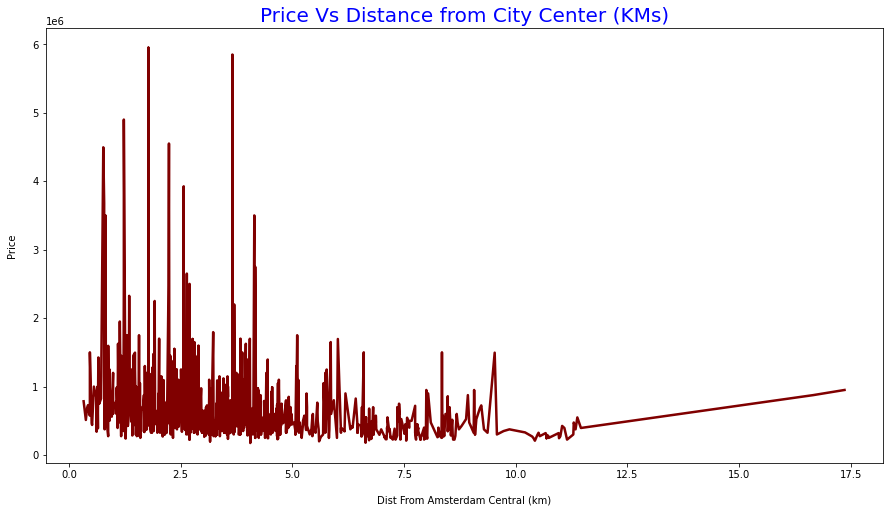

In [168]:
df.set_index('Dist From Amsterdam Central (km)')['Price'].plot(figsize=(15, 8), linewidth=2.5, color='maroon')
plt.xlabel("Dist From Amsterdam Central (km)", labelpad=15)
plt.ylabel("Price", labelpad=15)
plt.title("Price Vs Distance from City Center (KMs)", fontsize=20,
          color="blue")

**Area which are closed to Amsterdam's central areas is particularly expensive.**

## Price/Sqm Vs Distance from City Center

Text(0.5, 1.0, 'Price per Square Meter Vs Distance from City Center (KMs)')

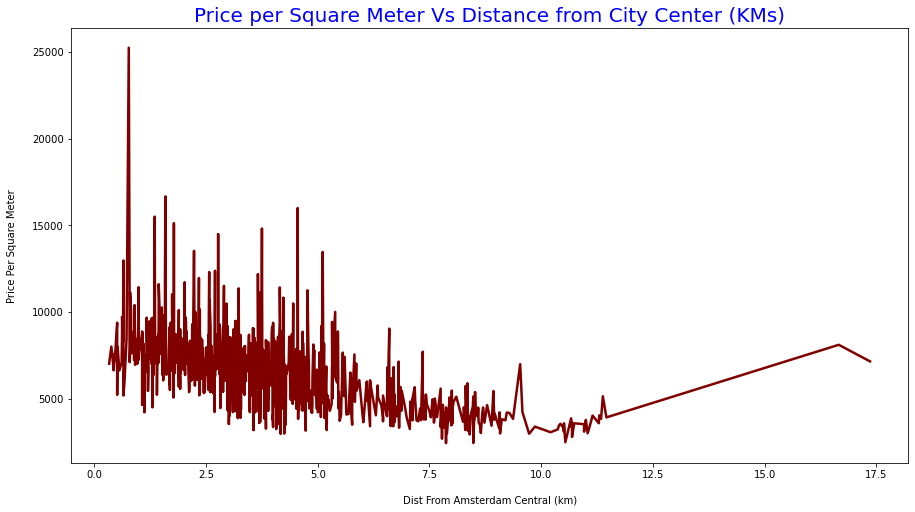

In [172]:
df.set_index('Dist From Amsterdam Central (km)')['price_sqm'].plot(figsize=(15, 8), linewidth=2.5, color='maroon')
plt.xlabel("Dist From Amsterdam Central (km)", labelpad=15)
plt.ylabel("Price Per Square Meter", labelpad=15)
plt.title("Price per Square Meter Vs Distance from City Center (KMs)",fontsize=20, color = 'blue')

## Analysis based on Zip code

In [173]:
df.groupby(['Zip_number']).Price.agg(['mean', 'min', 'max']) #mean, max, min price acording to zip location 

,mean,min,max
Zip_number,,,
1011,7.453750e+05,389000.0,1500000.0
1012,1.093533e+06,340000.0,4495000.0
1013,5.758696e+05,275000.0,1950000.0
1014,9.630000e+05,475000.0,1450000.0
1015,9.377727e+05,250000.0,3500000.0
...,...,...,...
1104,3.500098e+05,250000.0,600000.0
1106,3.089000e+05,209000.0,395000.0
1107,2.996667e+05,225000.0,425000.0


In [176]:
# number of adrees in ascending order for per zip location
df.groupby(['Zip_number']).Address.count().sort_values(ascending = True)

Zip_number
1022     1
1109     2
1028     2
1108     3
1096     4
        ..
1058    25
1053    26
1068    26
1055    29
1017    31
Name: Address, Length: 70, dtype: int64

#### Number of house sales Vs Zip Code (i.e location)

In [182]:
sales = df.groupby(['Zip_number']).Address.count().sort_values(ascending = False)
sales


Zip_number
1017    31
1055    29
1068    26
1053    26
1058    25
        ..
1096     4
1108     3
1028     2
1109     2
1022     1
Name: Address, Length: 70, dtype: int64

Text(0.5, 1.0, 'No. of house sales Vs Zip Code (i.e location)')

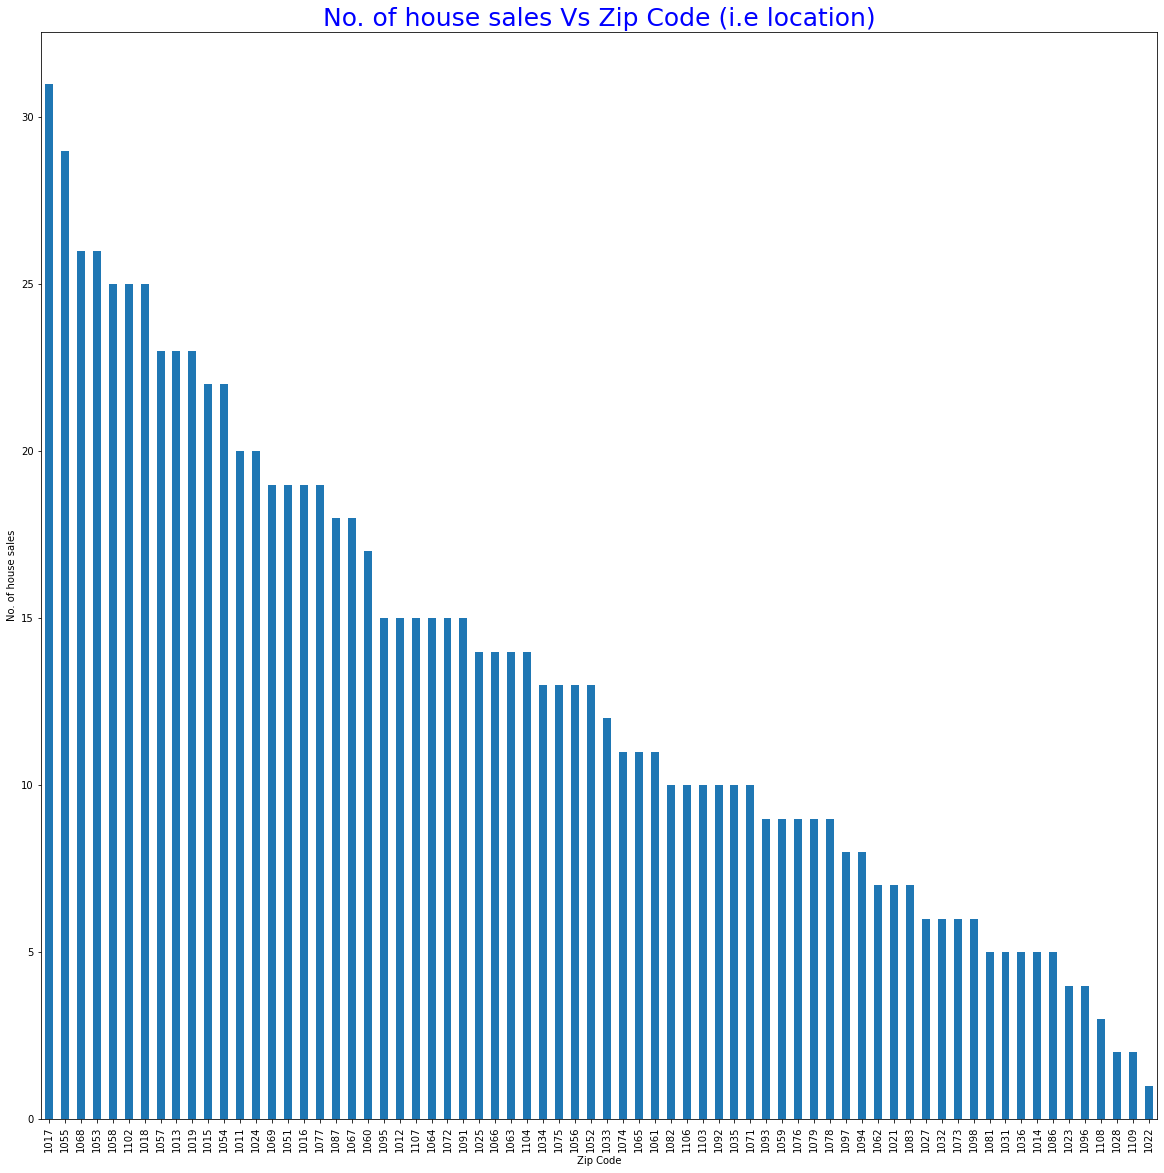

In [185]:
sales.plot(figsize=(20, 20),kind="bar")
plt.xlabel("Zip Code")
plt.ylabel("No. of house sales")
plt.title("No. of house sales Vs Zip Code (i.e location)", fontsize =25, color = 'blue')

**From this barplot, it is visible that maximum house sales are at 1017 zip code.**

##### Number of house sales Vs Distance from the City Center

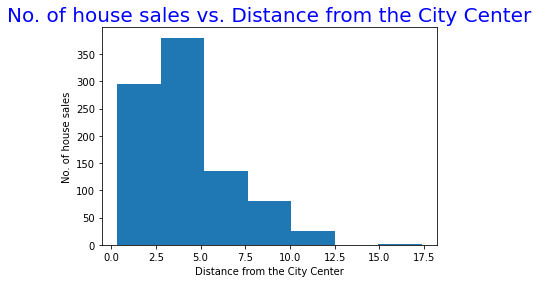

In [186]:
df['Dist From Amsterdam Central (km)'].plot(kind="hist",bins=7);
plt.xlabel("Distance from the City Center")
plt.ylabel("No. of house sales")
plt.title("No. of house sales vs. Distance from the City Center", fontsize =20, color ='blue')
plt.show()

**Most of the houses sold are within 5kms of the city center.**

## Analysis based on number of rooms

In [192]:
df.groupby(['Room']).Price.agg(['mean', 'min', 'max'])

,mean,min,max
Room,,,
1,3.945294e+05,175000.0,950000.0
2,3.834791e+05,179000.0,1450000.0
3,5.124164e+05,225000.0,2475000.0
4,6.111506e+05,260000.0,3680000.0
5,8.450764e+05,265000.0,4495000.0
6,9.199286e+05,350000.0,2500000.0
7,1.394737e+06,600000.0,3925000.0
8,1.751636e+06,700000.0,3500000.0
9,1.450000e+06,900000.0,1775000.0


In [194]:
df.groupby(['Room']).price_sqm.agg(['mean', 'min', 'max'])

,mean,min,max
Room,,,
1,7844.188322,3484.496124,11956.521739
2,7252.434729,3409.090909,16000.000000
3,6444.175147,2976.190476,16666.666667
4,5781.493228,2783.018868,13524.590164
5,6214.480878,2431.192661,25252.808989
6,5984.665348,2430.555556,15500.000000
7,6683.847610,4109.589041,12304.075235
8,6897.005908,3473.913043,10057.471264
9,7300.009220,5660.377358,10028.248588


In [188]:
df.groupby(['Room']).Address.count().sort_values(ascending = False)

Room
3     330
4     200
2     191
5      97
6      42
7      19
1      17
8      11
9       6
14      2
13      2
10      2
Name: Address, dtype: int64

**Maximum houses sold are those with 3 rooms. Houses with 2 to 4 rooms are in great demand.**

In [189]:
df.groupby(['Room']).Price.agg(['mean', 'min', 'max'])

,mean,min,max
Room,,,
1,3.945294e+05,175000.0,950000.0
2,3.834791e+05,179000.0,1450000.0
3,5.124164e+05,225000.0,2475000.0
4,6.111506e+05,260000.0,3680000.0
5,8.450764e+05,265000.0,4495000.0
6,9.199286e+05,350000.0,2500000.0
7,1.394737e+06,600000.0,3925000.0
8,1.751636e+06,700000.0,3500000.0
9,1.450000e+06,900000.0,1775000.0


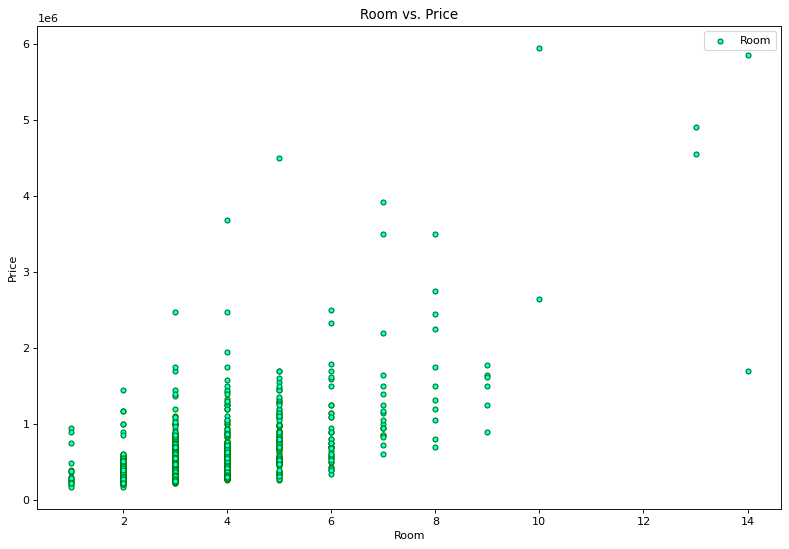

In [196]:
plt.figure(figsize=(12, 8), dpi=80)
plt.scatter(df['Room'],df['Price'], s=20, edgecolor="green", c="cyan", label="Room")
plt.xlabel("Room")
plt.ylabel("Price")
plt.title("Room vs. Price")
plt.legend()
plt.show()

**It is not necessary that the more the number of rooms are in a house indicates higher price price of it? Well, that is not what the graph shows as there are 5-rooms houses going for as little as 265000 EUR and as high as 4495000 EUR.It's depend on the location**

#### Number of house sold vs. Price

Text(0.5, 1.0, 'Price vs. Sale')

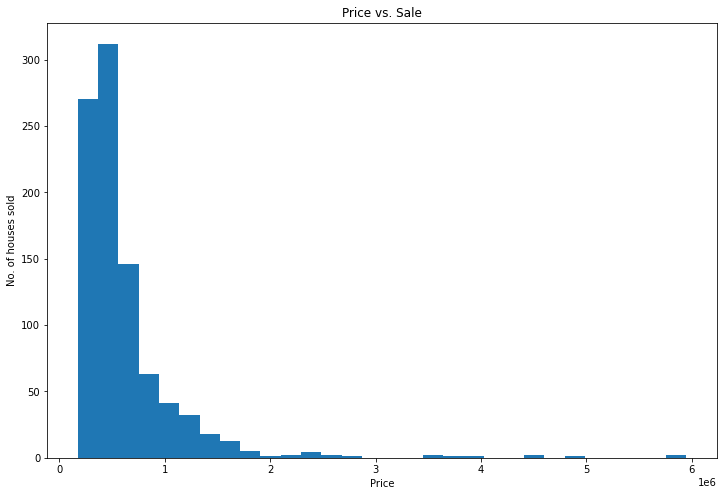

In [195]:
plt.figure(figsize=(12, 8))
df.Price.plot(kind="hist",bins=30)
plt.xlabel("Price")
plt.ylabel("No. of houses sold")
# after plotting the data, format the labels
#current_values = plt.gca().get_xticks()
# using format string '{:.0f}' here but you can choose others
#plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values])
plt.title("Price vs. Sale")

**Above histogram clearly shows that number of houses sold are signifacantly higher for price range of 200000 to 500000 EUR.**

#### Area vs. Price

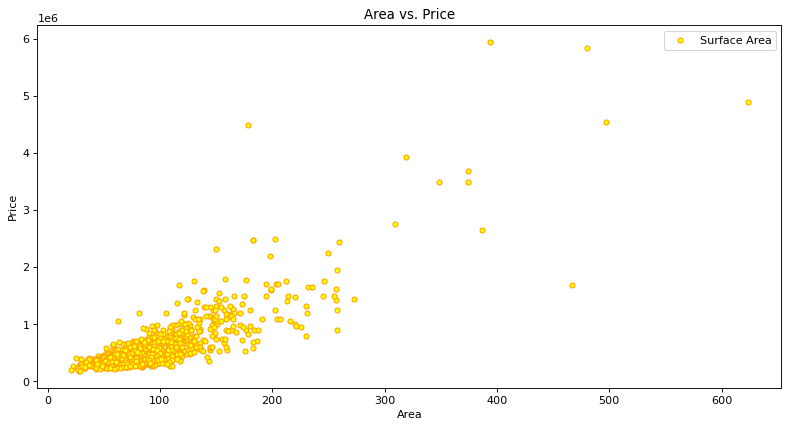

In [197]:
plt.figure(figsize=(12, 6), dpi=80)
plt.scatter(df['Area'],df['Price'], s=20, edgecolor="orange", c="yellow", label="Surface Area")
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Area vs. Price")
plt.legend()
plt.show()

**Bigger the house , higher the price.There is a clear upwards sloping trend relationship between the surface area of the house and the price of the house.**

#### Area vs. Price/Sqm

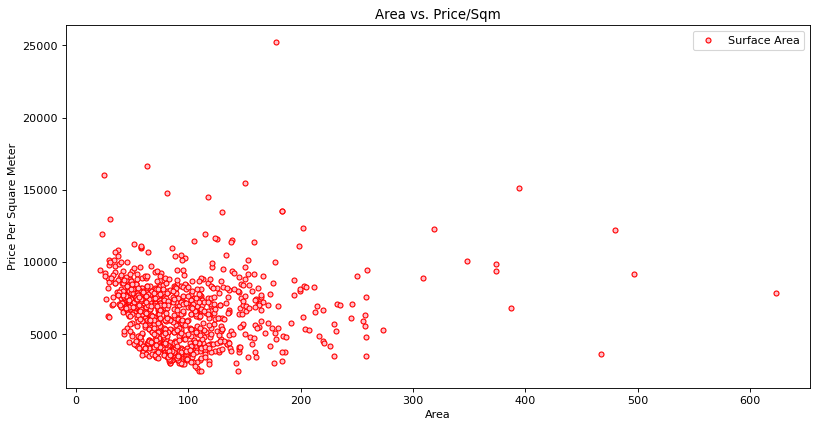

In [198]:
plt.figure(figsize=(12, 6), dpi=80)
plt.scatter(df['Area'],df['price_sqm'], s=20, edgecolor="red", c="pink", label="Surface Area")
plt.xlabel("Area")
plt.ylabel("Price Per Square Meter")
plt.title("Area vs. Price/Sqm")
plt.legend()
plt.show()

**Interesting observation here is as the house gets bigger, the marginal price of an additional square meter decreases.**